<a href="https://colab.research.google.com/github/tesseract314/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

In [0]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

# Making informative column names
cols = ['age',
       'year',
       'nodes_detected',
       'survival_status']

df = pd.read_csv(data_url, names=cols) # Adding column names to df to fill in missing header

In [28]:
df.head()

,age,year,nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [29]:
df.describe() # The count of each column indicates there are correct number of observations

,age,year,nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [30]:
df['age'].value_counts()
df['year'].value_counts()
df['nodes_detected'].value_counts()
df['survival_status'].value_counts() # Did not see anything that indicates missing values with value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [0]:
# Replacing 2's with 0's in survival_status column
df['survival_status'] = df['survival_status'].replace(2, 0)

In [35]:
# Checking value counts again to make sure it's the same as above
df['survival_status'].value_counts()

1    225
0     81
Name: survival_status, dtype: int64

In [36]:
df.head()

,age,year,nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [38]:
# Looking at correlation matrix of all variables
df.corr()

,age,year,nodes_detected,survival_status
age,1.000000,0.089529,-0.063176,-0.067950
year,0.089529,1.000000,-0.003764,0.004768
nodes_detected,-0.063176,-0.003764,1.000000,-0.286768
survival_status,-0.067950,0.004768,-0.286768,1.000000


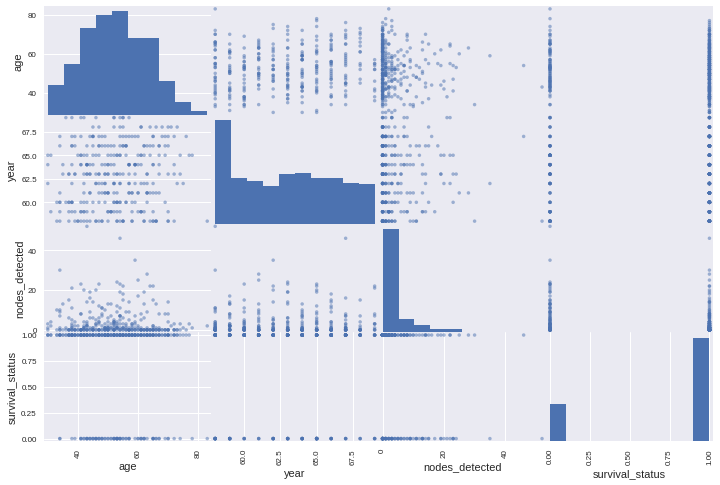

In [39]:
# Using a scatter matrix to visualize the relationships between variables

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12,8))
plt.show()

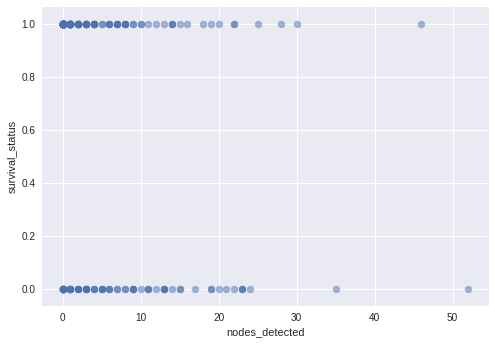

In [49]:
# Getting a closer look at the relationship between nodes_detected and survival_status
import numpy as np

fig, ax = plt.subplots() # Trying the fig, ax stuff

ax.scatter(df['nodes_detected'], df['survival_status'], alpha=.5)
ax.set_xlabel('nodes_detected')
ax.set_ylabel('survival_status')

ax.grid(True)
plt.show()

In [0]:
age_bins = pd.cut(df['age'], 5)
year_bins = pd.cut(df['year'], 5)
node_bins = pd.cut(df['nodes_detected'], 5)

In [62]:
pd.crosstab(age_bins, df['survival_status'], normalize='index')

# From this table, the survival rates look better for young people

survival_status,0,1
age,,
"(29.947, 40.6]",0.093023,0.906977
"(40.6, 51.2]",0.313131,0.686869
"(51.2, 61.8]",0.281250,0.718750
"(61.8, 72.4]",0.271186,0.728814
"(72.4, 83.0]",0.333333,0.666667


In [58]:
# Taking a more detailed look by adding a binned nodes_detected row

pd.crosstab(age_bins, [node_bins, df['survival_status']], normalize='index')

# This table really only tells us that the most of the nodes data is at the low end
# Not a very useful table

nodes_detected  (-0.052, 10.4]           (10.4, 20.8]           (20.8, 31.2]  \
survival_status              0         1            0         1            0   
age                                                                            
(29.947, 40.6]        0.069767  0.813953     0.000000  0.069767     0.023256   
(40.6, 51.2]          0.222222  0.636364     0.060606  0.050505     0.020202   
(51.2, 61.8]          0.197917  0.666667     0.052083  0.020833     0.020833   
(61.8, 72.4]          0.186441  0.677966     0.067797  0.016949     0.016949   
(72.4, 83.0]          0.333333  0.666667     0.000000  0.000000     0.000000   

nodes_detected            (31.2, 41.6]      (41.6, 52.0]            
survival_status         1            0    1            0         1  
age                                                                 
(29.947, 40.6]   0.023256     0.000000  0.0     0.000000  0.000000  
(40.6, 51.2]     0.000000     0.000000  0.0     0.010101  0.000000  
(51.2, 61.8]     0.020833     0.010417  0.0     0.000000  0.010417  
(61.8, 72.4]     0.033898     0.000000  0.0     0.000000  0.000000  
(72.4, 83.0]     0.000000     0.000000  0.0     0.000000  0.000000

In [65]:
# Looking at node bins with survival status
pd.crosstab(node_bins, df['survival_status'], normalize='index')

# From this table, it looks like the fewer nodes detected the higher chance of survival.
# But, again, there is not much data at the high end of the node bins

survival_status,0,1
nodes_detected,,
"(-0.052, 10.4]",0.218045,0.781955
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


In [70]:
# Looking at year bins with survival status

print(df['survival_status'].value_counts(normalize=True))
pd.crosstab(year_bins, df['survival_status'], normalize='index')

# Year compared to survival status doesn't tell us much. The chance of survival
# in each bin are very similar to the overall survival rate of the entire dataset

1    0.735294
0    0.264706
Name: survival_status, dtype: float64


survival_status,0,1
year,,
"(57.989, 60.2]",0.274725,0.725275
"(60.2, 62.4]",0.204082,0.795918
"(62.4, 64.6]",0.262295,0.737705
"(64.6, 66.8]",0.339286,0.660714
"(66.8, 69.0]",0.224490,0.775510


In [72]:
# Taking the most meaningful variables (age, nodes_detected, and survival_status)
# and creating a interactive 3d scatter plot

import plotly.plotly as py
py.sign_in('tesseract314', 'Jc3LvvZzqiVNef3dsp2O')
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(
    x=df['age'],
    y=df['nodes_detected'],
    z=df['survival_status'],
    mode='markers',
    marker=dict(
        size=8,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cancer_data_plot', sharing='public')

# Interesting that number of nodes is not a strong predictor of survival


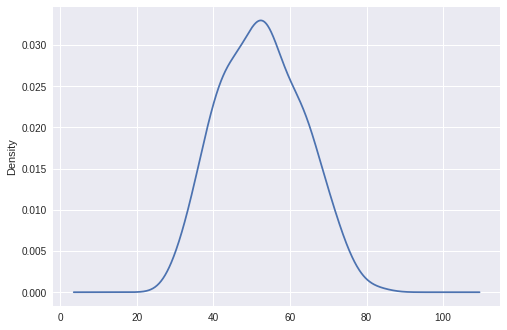

In [74]:
# Vizualizing where the center of the age data is
df['age'].plot.density()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

**The only feature that had a positive relationship with survival is year. However, this relationship is very weak (0.005 correlation). This may be due to the relatively short length of the study (12 years). Maybe over longer periods of time advancements in medicine and technology would show a stronger positive relationship.
**

- What is at least one feature that looks to have a negative relationship with survival?

**There were two features that had a negative relationship with survival: age and the number of positive nodes detected. Their correlations with survival were -0.068 and -0.287, respectively. Intuitively this makes sense because a younger person might be in better overall health and therefore better able to withstand cancer.  Also, more positive nodes detected could mean the spread of cancer is more severe.**

- How are those two features related with each other, and what might that mean?

**The strongest correlation year had (positive or negative) was with age, at 0.0895. There might not be any definitive reason for this relationship. Maybe the researchers pre-selected all the test patients in 1958 in a specific age range and, as the years progressed, the patients got older. Weird explanation, but it's the only thing I can think of.**

**Side Note: The survival rate could be related to a ton of other variables besides age and nodes detected. Many people in the study, even young people, died less than five years after the study without any positive nodes detected.**

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.